<a href="https://colab.research.google.com/github/rezakhanahmadi342341/projects/blob/main/age_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os , math , shutil , glob
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
import opendatasets as op
op.download('https://www.kaggle.com/datasets/trainingdatapro/age-detection-human-faces-18-60-years/data')

Dataset URL: https://www.kaggle.com/datasets/trainingdatapro/age-detection-human-faces-18-60-years


100%|██████████| 337M/337M [00:24<00:00, 14.5MB/s]


In [8]:
x_test = keras.utils.image_dataset_from_directory(
    directory = '/content/age-detection-human-faces-18-60-years/test',   # test data
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 25 files belonging to 5 classes.


In [9]:
x_train = keras.utils.image_dataset_from_directory(        # library we have to import
    directory = '/content/age-detection-human-faces-18-60-years/train',  # path of train data
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 125 files belonging to 5 classes.


In [10]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

In [11]:
x_train = x_train.map(process)
x_test = x_test.map(process)

In [12]:
base_model = keras.applications.MobileNet(input_shape=(256,256,3), include_top=False, weights='imagenet')
base_model.trainable = False

<ipython-input-12-fc8c09dfbaef>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNet(input_shape=(256,256,3), include_top=False, weights='imagenet')


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [13]:
model = keras.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='relu'),])



In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 8, 8, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,618,245 (44.32 MB)

 Trainable params: 8,389,381 (32.00 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [15]:
hist = model.fit(x_train, batch_size=32, epochs=15, validation_data=x_test)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.2563 - loss: 9.6239 - val_accuracy: 0.2400 - val_loss: 9.5286
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3562 - loss: 8.5684 - val_accuracy: 0.1600 - val_loss: 9.9551
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3974 - loss: nan - val_accuracy: 0.2000 - val_loss: 7.1761
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3977 - loss: 6.9543 - val_accuracy: 0.3600 - val_loss: 7.0784
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4771 - loss: 6.2456 - val_accuracy: 0.2000 - val_loss: 7.0979
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3543 - loss: 6.3404 - val_accuracy: 0.2000 - val_loss: 7.1170
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3218 - loss: 6.5129 - val_accuracy: 0.2000 - val_loss: 7.1330
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3491 - loss: 6.6490 - val_accuracy: 0.2000 - val_loss: 7.1474
Epoch 9/15
4/4 ━

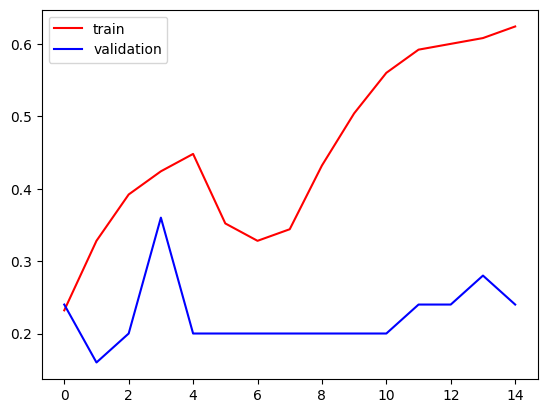

In [18]:
plt.plot(hist.history['accuracy'],color='red',label='train')
plt.plot(hist.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()